In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use('classic')


In [2]:
base = "https://raw.githubusercontent.com/pathstream-curriculum/Python/master/"
retail_features = "retail_features_4stores.csv"
retail_sales = "retail_sales_4stores.csv"

In [3]:
retail_sales_df = pd.read_csv(base + retail_sales)
retail_features_df = pd.read_csv(base + retail_features)

In [4]:
# convert Date to datetime
retail_sales_df["Date"] = pd.to_datetime(retail_sales_df.Date)
retail_features_df["Date"] = pd.to_datetime(retail_sales_df.Date)
# convert Store and Dept to string
retail_sales_df["Store"] = retail_sales_df.Store.astype("str")
retail_sales_df["Dept"] = retail_sales_df.Dept.astype("str")
retail_features_df["Store"] = retail_features_df.Store.astype("str")

#deal with the sorting issue up front
retail_sales_df.sort_values("Date", inplace=True)
retail_features_df.sort_values("Date", inplace=True)

In [5]:
retail_sales_df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1178,Los Angeles,Clothing,2010-01-10,27023.35,False
31,2751,Buffalo,Jewelry,2010-01-10,6947.26,False
30,1464,Los Angeles,Furniture,2010-01-10,12390.87,False
29,3609,Seattle,Housewares,2010-01-10,88537.23,False
28,463,Las Vegas,Jewelry,2010-01-10,34912.45,False


In [32]:
retail_joined_df = retail_features_df.merge(retail_sales_df, on=["Store", "Date"])
retail_joined_df_jwl = retail_joined_df.loc[retail_joined_df["Dept"] == "Jewelry"]
retail_joined_df_jwl.drop("IsHoliday_y", axis=1, inplace=True)

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Weekly Sales ($)')

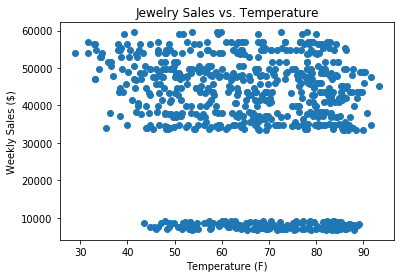

In [29]:
fig, ax = plt.subplots()
ax.scatter(retail_joined_df_jwl["Temperature"], retail_joined_df_jwl["Weekly_Sales"])
ax.set_title("Jewelry Sales vs. Temperature")
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Weekly Sales ($)")

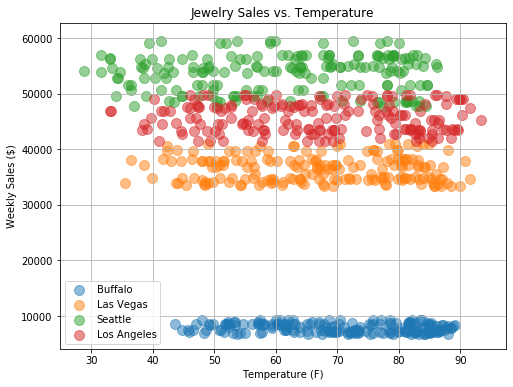

In [30]:
buffalo_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Buffalo"]
las_vegas_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Las Vegas"]
seattle_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Seattle"]
los_angeles_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Los Angeles"]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(buffalo_jwl["Temperature"], 
           buffalo_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           label="Buffalo")
ax.scatter(las_vegas_jwl["Temperature"], 
           las_vegas_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           label="Las Vegas")
ax.scatter(seattle_jwl["Temperature"], 
           seattle_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           label="Seattle")
ax.scatter(los_angeles_jwl["Temperature"], 
           los_angeles_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           label="Los Angeles")

ax.set_title("Jewelry Sales vs. Temperature")
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Weekly Sales ($)")
ax.grid(True)
plt.legend()

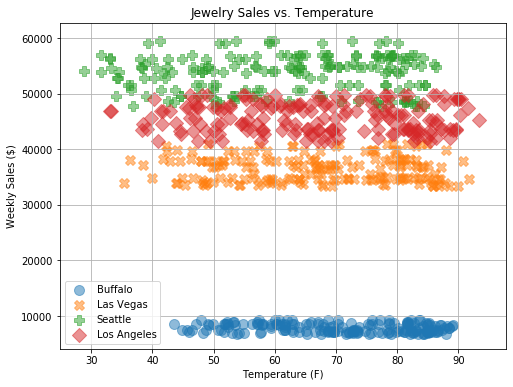

In [35]:
buffalo_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Buffalo"]
las_vegas_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Las Vegas"]
seattle_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Seattle"]
los_angeles_jwl = retail_joined_df_jwl.loc[retail_joined_df_jwl["Store"] == "Los Angeles"]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(buffalo_jwl["Temperature"], 
           buffalo_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           label="Buffalo")
ax.scatter(las_vegas_jwl["Temperature"], 
           las_vegas_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           marker="X",
           label="Las Vegas")
ax.scatter(seattle_jwl["Temperature"], 
           seattle_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           marker="P",
           label="Seattle")
ax.scatter(los_angeles_jwl["Temperature"], 
           los_angeles_jwl["Weekly_Sales"],
           alpha=0.5,
           s=100,
           marker="D",
           label="Los Angeles")

ax.set_title("Jewelry Sales vs. Temperature")
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Weekly Sales ($)")
ax.grid(True)
plt.legend()

In [33]:
retail_joined_df_jwl.loc[retail_joined_df_jwl.IsHoliday_x]

,Unnamed: 0_x,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Unnamed: 0_y,Dept,Weekly_Sales
0,463,Buffalo,2010-01-10,48.29,3.129,223.009084,7.197,True,2751,Jewelry,6947.26
56,146,Las Vegas,2010-01-10,56.23,3.211,223.561947,6.573,True,463,Jewelry,34912.45
112,151,Las Vegas,2010-01-10,44.79,3.108,223.960414,6.573,True,463,Jewelry,34912.45
250,593,Seattle,2010-01-10,38.09,2.955,127.087677,7.127,True,3895,Jewelry,54800.74
526,157,Las Vegas,2010-02-07,56.67,3.417,224.235029,6.525,True,450,Jewelry,39773.71
909,588,Seattle,2010-02-19,48.08,2.752,126.669267,7.127,True,3863,Jewelry,53939.17
1150,458,Buffalo,2010-02-26,68.00,3.236,221.901118,7.197,True,2720,Jewelry,8012.43
1188,599,Seattle,2010-02-26,33.29,3.033,127.859129,6.510,True,3864,Jewelry,54687.08
1349,317,Los Angeles,2010-03-09,87.65,3.730,222.074763,6.565,True,1603,Jewelry,48202.94
1409,31,Las Vegas,2010-03-09,78.69,2.565,211.495190,7.787,True,459,Jewelry,38321.88


,Unnamed: 0_x,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Unnamed: 0_y,Dept,Weekly_Sales,IsHoliday_y
0,463,Buffalo,2010-01-10,48.29,3.129,223.009084,7.197,True,2751,Jewelry,6947.26,False
1,463,Buffalo,2010-01-10,48.29,3.129,223.009084,7.197,True,3037,Outdoor,2530.38,False
2,463,Buffalo,2010-01-10,48.29,3.129,223.009084,7.197,True,2322,Clothing,5617.26,False
3,463,Buffalo,2010-01-10,48.29,3.129,223.009084,7.197,True,3180,Shoes,6134.59,False
4,463,Buffalo,2010-01-10,48.29,3.129,223.009084,7.197,True,2894,Electronics,7001.48,False


Text(0, 0.5, 'Fuel Price ($)')

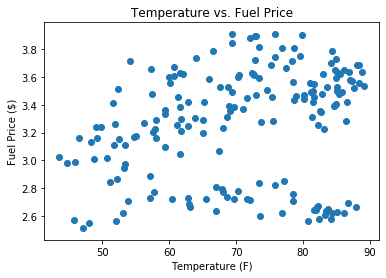

In [15]:
buffalo_features = retail_features_df.loc[retail_features_df.Store == "Buffalo"]

fig, ax = plt.subplots()
ax.scatter(buffalo_features["Temperature"], buffalo_features["Fuel_Price"])

ax.set_title("Temperature vs. Fuel Price")
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Fuel Price ($)")

728